# Проект "Анализ бизнес показателей" 
# Анализ убытков приложения ProcrastinatePRO+
***
## Описание проекта
Развлекательное приложение ProcrastinatePRO+ несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс
***
## Цель исследования
- Выяснить, откуда приходят пользователи и какими устройствами они пользуются.
- Определить, стоимость привлечения пользователей из различных рекламных каналов.
- Определить, сколько денег приносит каждый клиент.
- Выяснить, когда расходы на привлечение клиента окупаются.
- Установить факторы, которые мешают привлечению клиентов.
***
## Задачи исследования
  1. [Загрузка и подготовка данных](#p1):
  
        
        
  2. Создание функций для расчета анализа LTV, ROI, удержания и конверсии:
  
        - [Функция для создания профилей пользователей](#p2);
        
        - [Функция для подсчёта Retention Rate](#p3);
        
        - [Функция для подсчёта конверсии](#p4);
        
        - [Функция для подсчёта LTV](#p5);
        
        - [Функции для построения графиков](#p6). 
        
        
  3. Исследовательский анализ данных:
        
        - [Анализ пользователей по странам](#p7);
        
        - [Анализ пользователей в зависимости от устройства](#p8);
        
        - [Анализ пользователей по каналу привлечения](#p9).


  4. Маркетинг:
  
        - [Определение общих расходов на маркетинг](#p10);
        
        - [Распределение расходов по рекламным источникам](#p11);
        
        - [Динамика измнения расходов по времени](#p12);
        
        - [Определение CAC по источнику привлечения](#p13).
        
  5. Оценка окупаемости рекламы:
  
        - [Анализ окупаемости рекламы в целом](#p14);
        
        - [Анализ окупаемости рекламы с разбивкой по устройствам](#p15).
        
        - [Анализ окупаемости рекламы с разбивкой каналам привлечения](#p16).
        
        - [Анализ окупаемости рекламы с разбивкой по странам](#p17).



  6. [Выводы и рекомендации](#p18)
***
## Описание данных

В распоряжении три датасета: 

    1) visits_info_short.csv - лог сервера с информацией о посещениях сайта; 

    2) orders_info_short.csv - лог с информацией о заказах; 

    3) costs_info_short.csv - лог с информацией о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
    
* Region — страна пользователя,

* Device — тип устройства пользователя,

* Channel — идентификатор источника перехода,

* Session Start — дата и время начала сессии,

* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,

* Event Dt — дата и время покупки,

* Revenue — сумма заказа.

Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,

* Channel — идентификатор рекламного источника,

* costs — расходы на эту кампанию.

<a id='p1'></a>
# Загрузка и подготовка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv(r"C:\Users\uubus\Desktop\Новая папка\visits_info_short.csv")
orders = pd.read_csv(r"C:\Users\uubus\Desktop\Новая папка\orders_info_short.csv")
costs = pd.read_csv(r"C:\Users\uubus\Desktop\Новая папка\costs_info_short.csv")

In [3]:
# отобразим первые пять строк 3 датафреймов
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
#Удаление явных дубликатов
visits = visits.drop_duplicates().reset_index(drop=True)
orders = orders.drop_duplicates().reset_index(drop=True)
costs = costs.drop_duplicates().reset_index(drop=True)

Поиск пустых значений:

In [8]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [9]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [10]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

Пустых значений нет

Приведем названия столбцов всех таблиц к нижнему регистру:

In [11]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Приведем названия некоторых столбцов к змеиному регистру:

In [12]:
visits = visits.rename(columns = {'user id':'user_id','session start':'session_start','session end':'session_end'})
orders = orders.rename(columns = {'user id':'user_id','event dt':'event_dt'})

Преобразуем тип данных столбцов с датами:

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Cоздание функция для расчета и анализа LTV, ROI, удержания и конверсии


<a id='p2'></a>
## Функция для создания пользовательских профилей

In [14]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


<a id='p3'></a>
## Функция для подсчета удержания

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='p4'></a>
## Функция для подсчета конверсии

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='p5'></a>
## Функция для подсчета LTV

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a id='p6'></a>
## Функции для построения графиков

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

<a id='p7'></a>
## Анализ пользователей по странам

Cоставим профили пользователей и определелим минимальную и максимальную дату привлечения

In [22]:
profiles = get_profiles(visits,orders,costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
#min и max  дата привлечения
min_date = profiles['first_ts'].min().date()
max_date = profiles['first_ts'].max().date()
print('Минимальная дата привлечения:',min_date,'\nМаксимальная дата привлечения:',max_date,)

Минимальная дата привлечения: 2019-05-01 
Максимальная дата привлечения: 2019-10-27


Создадим таблицу, отражающую количество пользователей и долю платящих из каждой страны и отобразим их на графиках

In [24]:
#используем для этого датафрейм profiles
#создаем таблицу с количеством пользователей в каждой стране
region_users = profiles.groupby('region').agg({'user_id':'count'}).rename(columns = {'user_id':'users'})
#создаем таблицу с долей платящих пользователей в каждой стране
region_rate = profiles.groupby('region').agg({'payer':'mean'}).rename(columns = {'payer':'rate'})
#переведем долю в проценты
region_rate = region_rate['rate']*100
#объединяем таблицу
region_final = region_users.merge(region_rate, on='region')
region_final 

,users,rate
region,,
France,17450,3.799427
Germany,14981,4.111875
UK,17575,3.982930
United States,100002,6.901862


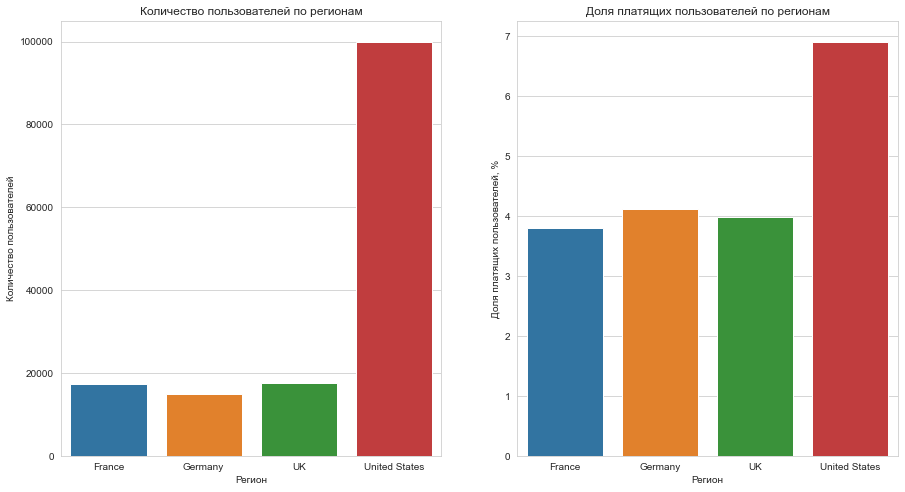

In [25]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (15,8),nrows=1,ncols=2)
list_of_y_label = ['Количество пользователей','Доля платящих пользователей, %']
list_of_title = ['Количество пользователей по регионам','Доля платящих пользователей по регионам']
for i in [0,1]:
    ax[i].grid(True, axis='y')
    ax[i] = sns.barplot(data = region_final,
                        y = region_final.columns[i],
                        x = region_final.index,
                        ax = ax[i])
    ax[i].set_ylabel(list_of_y_label[i])
    ax[i].set_title(list_of_title[i])
    ax[i].set_xlabel('Регион')
plt.show()

**Вывод**
1) Пользователей из США больше в 5 раз чем в пользователей из других стран  
2) Доля платящих пользователей из США больше почти в 2 раза чем в других странах  
3) Таким образом, можно сказать, что рынок США является более активным и на него следует ориентироваться  
4) Однако доля платящих пользователей даже для США всего 7%, что является не высоким показателем и есть потенциал для роста  

<a id='p8'></a>
## Анализ пользователей в зависимости от устройства

Создадим таблицу, отражающую количество пользователей и долю платящих для каждого устройства и визуализируем

In [26]:
#используем для этого датафрейм profiles
#создаем таблицу с количеством пользователей в каждой стране
device_users = profiles.groupby('device').agg({'user_id':'nunique'}).rename(columns = {'user_id':'users'})
#создаем таблицу с долей платящих пользователей в каждой стране
device_rate = profiles.groupby('device').agg({'payer':'mean'}).rename(columns = {'payer':'rate'})
#переведем долю в проценты
device_rate = device_rate['rate']*100
#объединяем таблицу
device_final = device_users.merge(device_rate, on='device')
device_final

,users,rate
device,,
Android,35032,5.851793
Mac,30042,6.364423
PC,30455,5.046790
iPhone,54479,6.207897


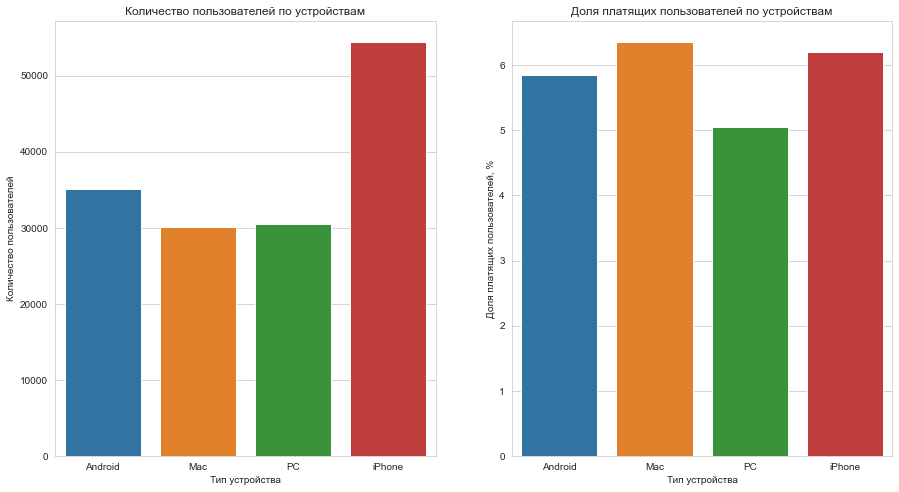

In [27]:
fig,ax = plt.subplots(figsize = (15,8),nrows=1,ncols=2)
list_of_y_label = ['Количество пользователей','Доля платящих пользователей, %']
list_of_title = ['Количество пользователей по устройствам','Доля платящих пользователей по устройствам']
for i in [0,1]:
    ax[i] = sns.barplot(data = device_final,
                        y = device_final.columns[i],
                        x = device_final.index,
                        ax = ax[i])
    ax[i].set_ylabel(list_of_y_label[i])
    ax[i].set_title(list_of_title[i])
    ax[i].set_xlabel('Тип устройства')
    ax[i].grid(True, axis='y')
plt.show()

**Вывод**
1) Пользователей айфонов на 60% больше чем пользователей других устройств  
2) Доля платящих пользователей не зависит от типа устройств и колеблется в пределах 5-6%   

<a id='p9'></a>
## Анализ пользователей по каналу привлечения

Создадим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения и визулируем 

In [28]:
#используем для этого датафрейм profiles
#создаем таблицу с количеством пользователей в каждой стране
channel_users = profiles.groupby('channel').agg({'user_id':'count'}).rename(columns = {'user_id':'users'})
#создаем таблицу с долей платящих пользователей в каждой стране
channel_rate = profiles.groupby('channel').agg({'payer':'mean'}).rename(columns = {'payer':'rate'})
#переведем долю в проценты
channel_rate = channel_rate['rate']*100
#объединяем таблицу
channel_final = channel_users.merge(channel_rate, on='channel')
channel_final

,users,rate
channel,,
AdNonSense,3880,11.340206
FaceBoom,29144,12.204914
LeapBob,8553,3.063253
MediaTornado,4364,3.574702
OppleCreativeMedia,8605,2.707728
RocketSuperAds,4448,7.913669
TipTop,19561,9.600736
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531


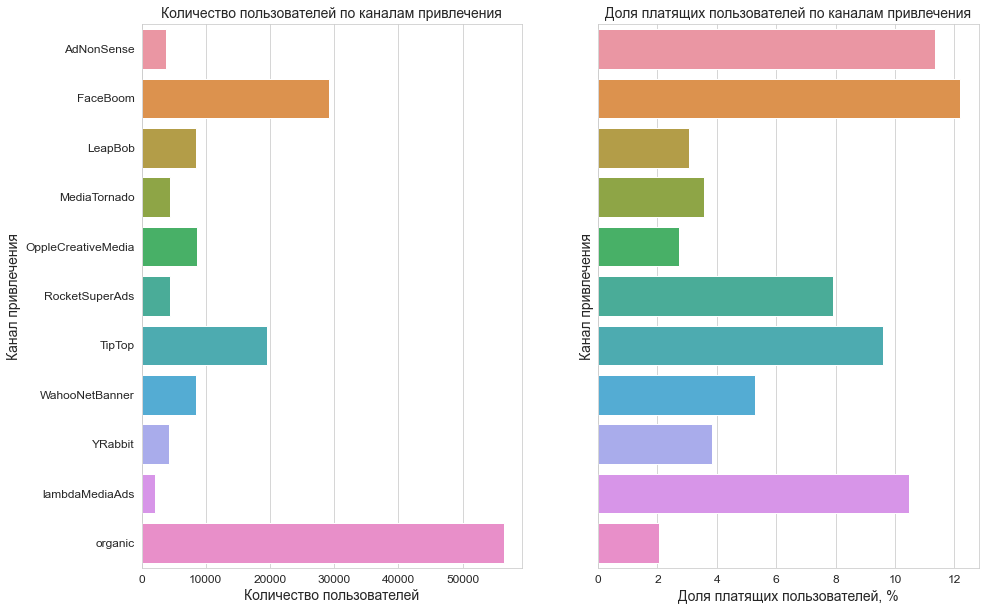

In [29]:
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12)
fig,ax = plt.subplots(figsize = (15,10),nrows=1,ncols=2,sharey=True)
list_of_x_label = ['Количество пользователей','Доля платящих пользователей, %']
list_of_title = ['Количество пользователей по каналам привлечения','Доля платящих пользователей по каналам привлечения']
for i in [0,1]:
    ax[i] = sns.barplot(data = channel_final,
                        x= channel_final.columns[i],
                        y = channel_final.index,
                        orientation = 'horizontal',
                        ax = ax[i])
    ax[i].set_xlabel(list_of_x_label[i])
    ax[i].set_title(list_of_title[i])
    ax[i].set_ylabel('Канал привлечения')
    ax[i].grid(True, axis='x')
plt.show()

**Вывод**
1) Больше всего пользователей, пришедших самостоятельно. Но доля тех кто платит среди них самая минимальная   
2) Из каналов привлечений лидерами являются (в порядке убывания): FaceBoom и TipTop   
3) Лидерами по доле платящих пользователей (в порядке убывания) являются: FaceBoom, AdNonSense, lambadaMediaAds, TipTop, RocketSuperAds.  
4) Можно было улучшить свои отношения с FaceBoom и TipTop так как они наиболее эффективны в комбинации кол-во/процент платящих.

# Маркетинг

<a id='p10'></a>
## Общие расходы на маркетинг

In [30]:
#для этого нам необходима таблица costs
print('Общая сумма расходов на маркетинг составляет:',round(costs['costs'].sum()))

Общая сумма расходов на маркетинг составляет: 105497


<a id='p11'></a>
## Расходы по рекламным источникам

In [31]:
print(costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs'))

                       costs
channel                     
YRabbit               944.22
MediaTornado          954.48
lambdaMediaAds       1557.60
LeapBob              1797.60
RocketSuperAds       1833.00
OppleCreativeMedia   2151.25
AdNonSense           3911.25
WahooNetBanner       5151.00
FaceBoom            32445.60
TipTop              54751.30


**Вывод**  
Наибольшие расходы у компании уходят на FaceBoom и TipTop, однако пока видно, что они оправданы, так как они привлекают больше всего пользователей и  доля покупающих у них высокая. Дальнейший анализ может опровергнуть это.

<a id='p12'></a>
## Динамика изменения расходов во времени

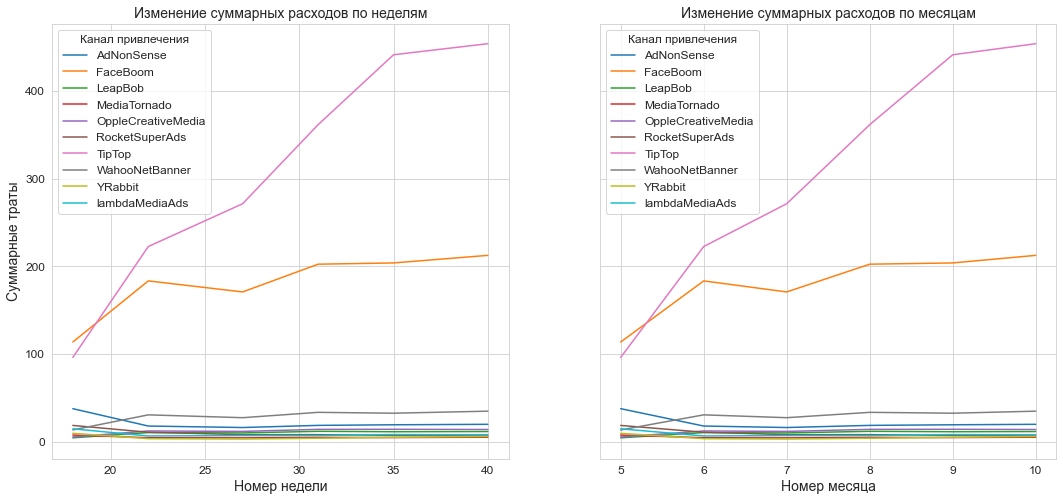

In [32]:
#создаем столбы с номером недели и месяца для каждой даты 
costs['month'] =  costs['dt'].astype('datetime64[M]').dt.month
costs['week'] = costs['dt'].astype('datetime64[M]').dt.isocalendar().week
#строим первый график изменения расходов по недеялм по каждому источнику
fig,ax = plt.subplots(figsize = (18,8),nrows=1,ncols=2,sharey=True)
ax[0] = costs.pivot_table(index='channel',columns='week',values='costs',aggfunc='mean').T.plot(ax=ax[0])
ax[0].set_xlabel('Номер недели')
ax[0].set_title('Изменение суммарных расходов по неделям')
#строим первый график изменения расходов по месяцам по каждому источнику
ax[1]  = costs.pivot_table(index='channel',columns='month',values='costs',aggfunc='mean').T.plot(ax=ax[1])
plt.xlabel('Номер месяца')
ax[0].set_ylabel('Суммарные траты')
plt.title('Изменение суммарных расходов по месяцам')
ax[0].legend(fontsize = 12,
              ncol = 1,    
              title = 'Канал привлечения',
              title_fontsize = '12'
             )
ax[1].legend(fontsize = 12,
              ncol = 1,    
              title = 'Канал привлечения',
              title_fontsize = '12'
             )
plt.show()

**Вывод**  
Из графиков видно, что расходы на рекламу увеличиваются в течение года (с мая по октябрь) только для двух каналов привлечения: TipTop и FaceBoom. Причем для TipTop расходы самые большие.  
Для остальных компаний расходы в течение года (с мая по октябрь)  не меняются

<a id='p13'></a>
## Определение CAC по источнику првиления

In [33]:
cac_by_channel = profiles.groupby('channel').agg({'acquisition_cost':'mean'})
cac_by_channel

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


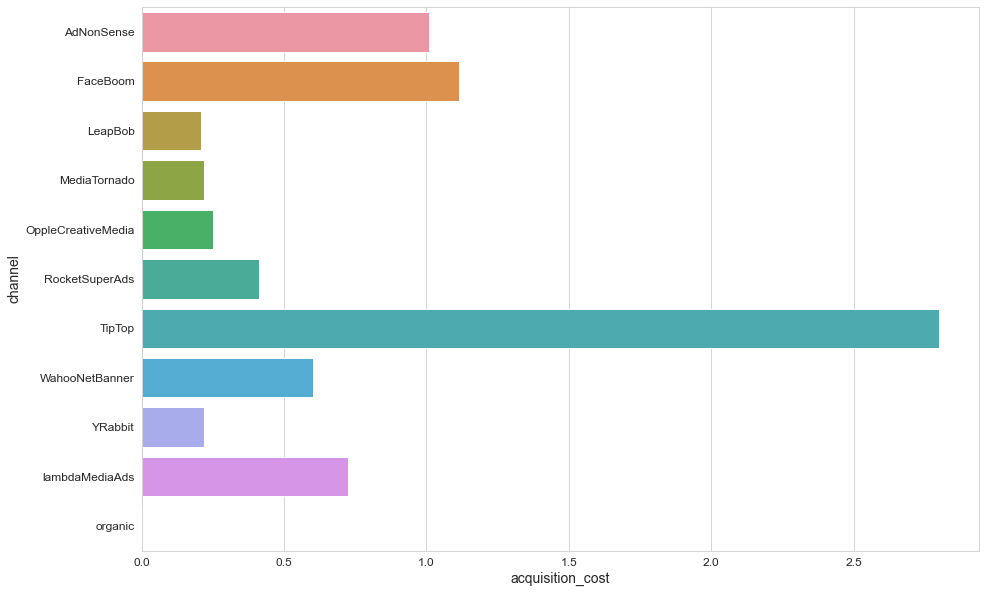

In [34]:
fig,ax = plt.subplots(figsize = (15,10))
list_of_title = ['Количество пользователей по каналам привлечения','Доля платящих пользователей по каналам привлечения']
cac_by_channel = profiles.groupby('channel').agg({'acquisition_cost':'mean'})
ax = sns.barplot(data = cac_by_channel,
                        y= cac_by_channel.index,
                        x ='acquisition_cost',
                        orientation = 'horizontal')
ax.set_ylabel='Канал привлечения'
ax.set_title='CAC по источникам'
ax.set_xlabel = 'Cредняя стоимость привлечения'

**Вывод**  
-Слишком высокая стоимость привлечения клиентов для TipTop = 2,7  
-Также высокая стоимость привлечения клиентов для FaceBoom, AdNonSense = 1, но почти  в два раза меньше чем для TipTop.  
-Можно сказать, что FaceBoom является более эффективным каналом привлечения по сравнению с TipTop с учетом количество -привлеченных пользователей, доли платящих пользователей и среднего  CAC.  
-Пока можно сказать, что компания терпит убытки последние несколько месяцев из-за cлишком больших вложений в TipTop, которые не оправдываются  

# Оценка окупаемости рекламы

<a id='p14'></a>
## Анализ окупаемости рекламы в целом

Для оценки окупаемости, по заданию даны следующие условия: 1) анализ проводим на 1 ноября 2019 года; 2) в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Так как мы изучаем затраты на привлечение, то удалим из профилей пользователей с каналом привлечения organic

In [35]:
profiles1=profiles.copy()
profiles1=profiles1[profiles1['channel']!='organic']

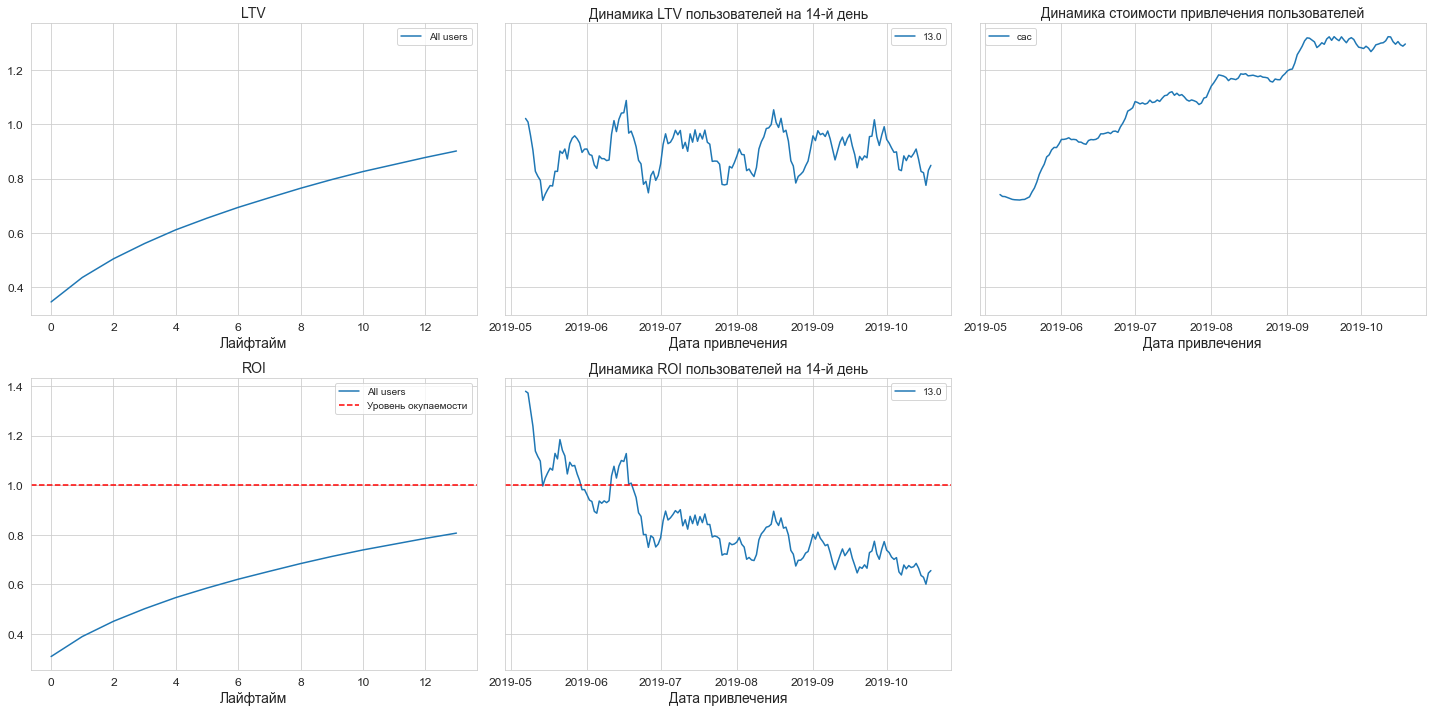

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, pd.to_datetime('11-01-2019'), 14
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14)

- Судя по графикам, реклама не окупается ROI в конце второй недели около 80%
- По динамике ROI видно, что реклама с начала июля перестает окупаться. В середине июля есть скачок ROI во время которого реклама окупалась
- Все это может связано с увеличеним CAC 
- LTV растет равномерно, значит проблема не в качестве пользователей

In [37]:
horizon_days = 14
observation_date = pd.to_datetime('11-01-2019')

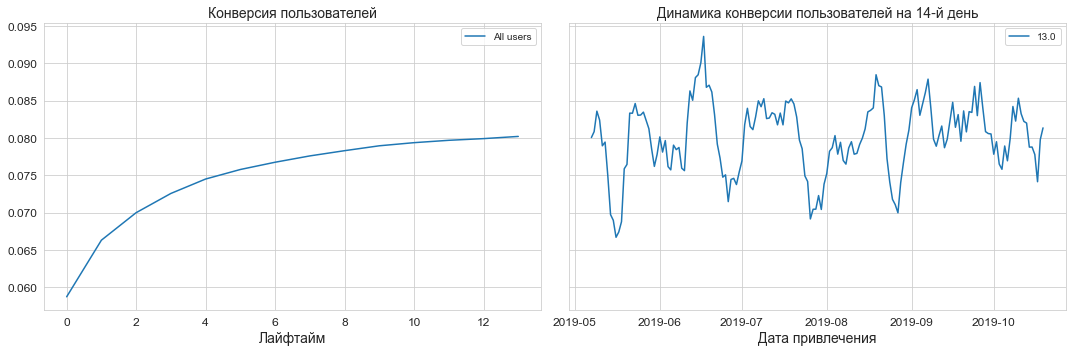

In [38]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Пользователи хорошо конвертируются из неплатящих в платящие
- Судя по динамике, конвертация постоянна, но имеет выбросы в конце месяца с определенной периодичностью

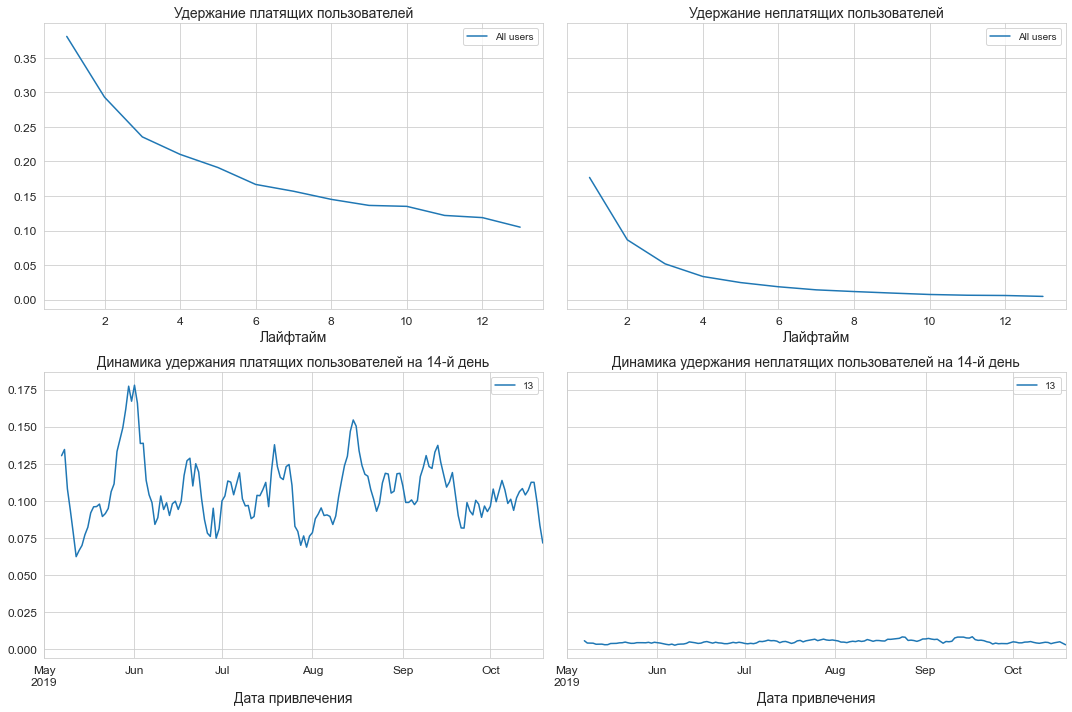

In [39]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

- Судя по графикам платящих пользователй только 10 часть из них возвращаются на 14 день после первого посещения. Неплатящие вообще не возвращаются на 14 день
- В течение периода анализа удержание как платящих, так и не платящих вцелом оставалось стабильным 

<a id='p15'></a>
## Анализ окупаемости рекламы с разбивкой по устройствам

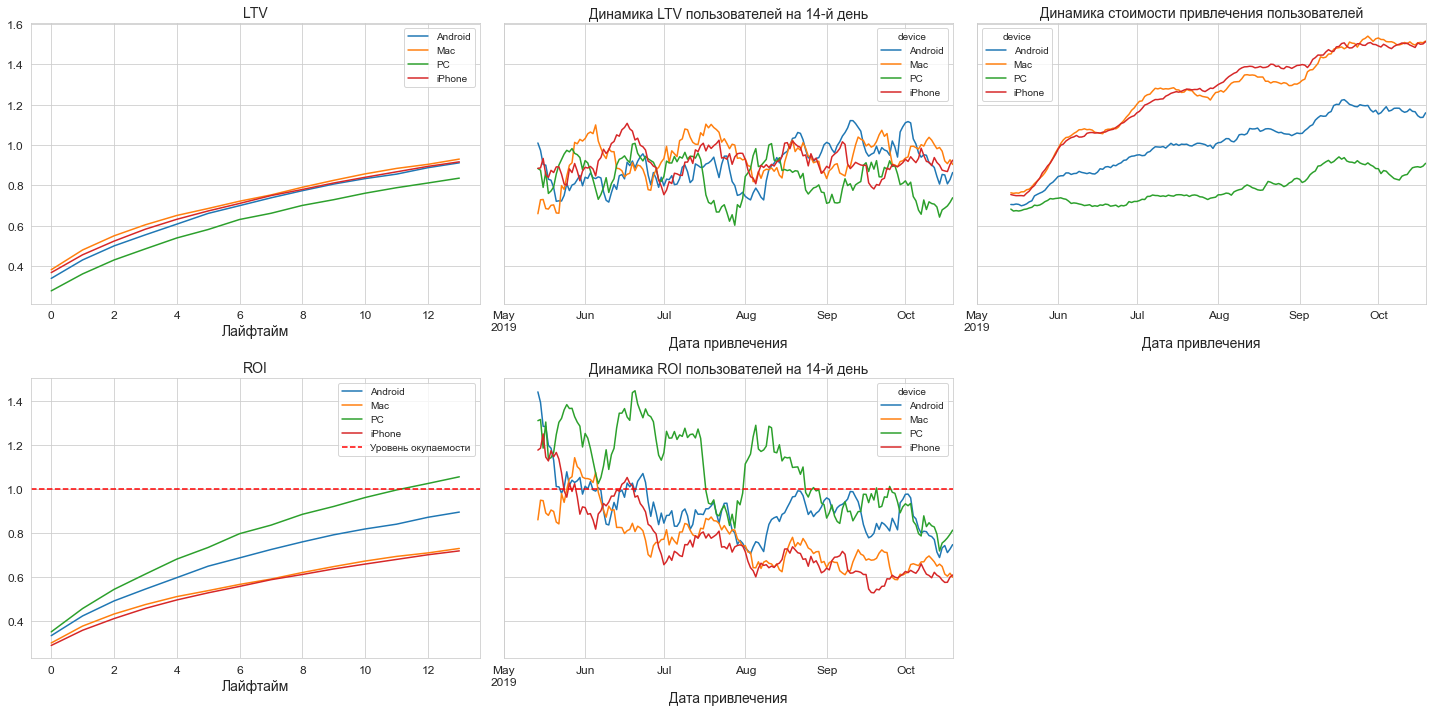

In [40]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV для всех устройств растет равномерно
- LTV низкая до начала июня, после этого становится выше и стабильно не меняется
- Стоимость привлечения пользователей максимальная для пользователей MAC и iPhone, далее идет Android и PC. Причем для всех устройств характерен резкий рост до первой декады июня, далее идет постепенный рост.
- Реклама окупается для пользователей PC. Для остальных девайсов реклама не окупаются, окупаемость android на 14 день = 90% выше чем mac и iphone = 70%.
- По динамике ROI видно, что реклама для PC окупается до начала сентября, за исключением конца июля
- ROI для всех девайсов имеет тенденцию к падениию 
- Таким образом реклама неэффективно работает для пользователей любых девайсов. Эффективность снижается в следующем порядке: PC, Android, Mac, iphone. Расходы на рекламу ступенчато растут, а количество пользователей не растет в нужных темпах и качество пользователей не увеличивается. 

<a id='p16'></a>
## Анализ окупаемости рекламы с разбивкой по каналам привлечения

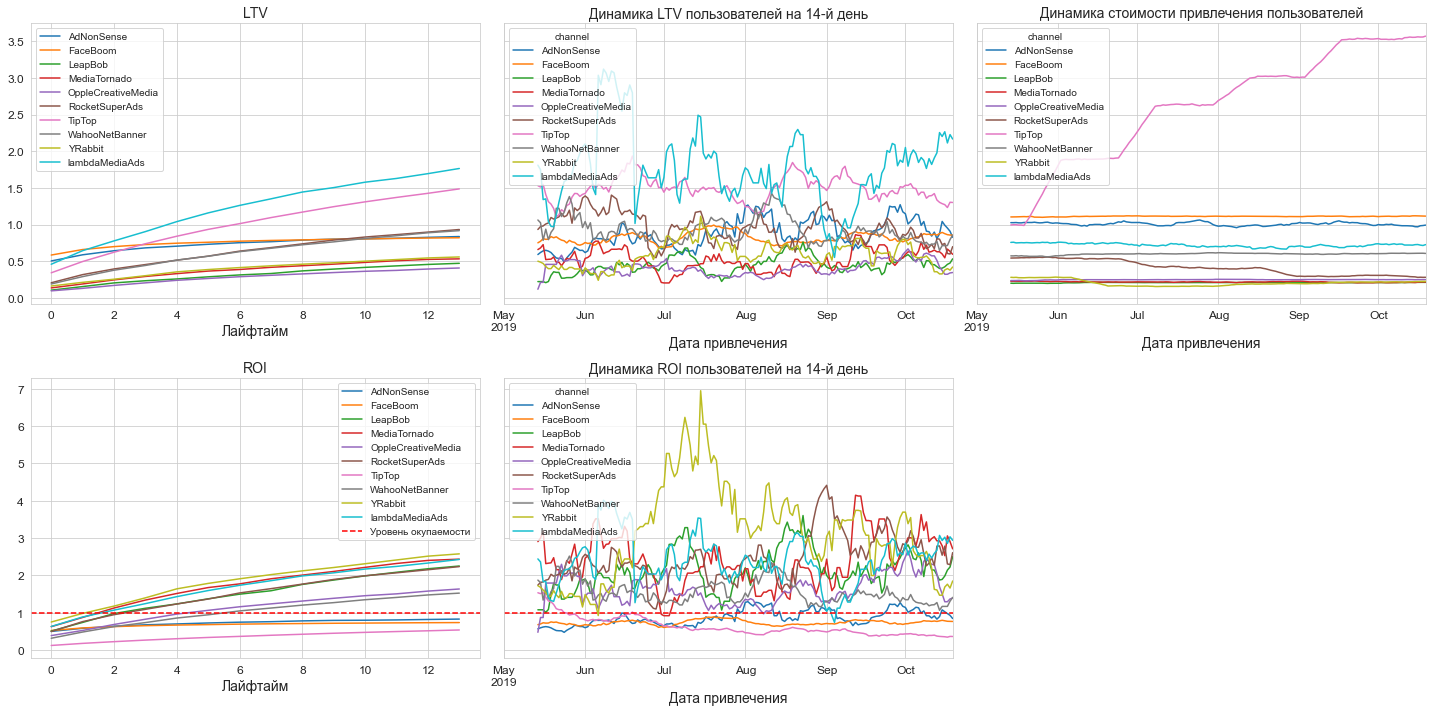

In [41]:
# смотрим окупаемость с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Самые ценные пользователи у lambdamediads, далее идет titop после них примерно на одном уровне faceboom, adnonsense, rocketsuperads и wahoonetbanner.
- Ценность пользователей пришедших с различных рекламных каналов не меняется за весь период анализа
- По динамаке CAC видно, что с каждым месяцем идет ступенчатое увеличение стоимости привлечения для TipTop, что говорит об их низкой эффективности. Для остальных каналов стоимость привлечения постоянна, за исключением RocketSuperAds, для которого стоимость даже несколько снижается примерно на 0.3
- Каналы привлечения titop, faceboom, adnonsense не окупаются на 14 день ROI их соответсвенно 0.5, 0.8, 0.9.
- Остальные каналы очень хорошо окупаются (почти в 2.5 раза), за исключением ooplecreativemedia и wahoonetbanner, у которых окупаемость на уровне 1.5
- По динамике ROI видно, что окупаемость не меняется за весь период анализа. Для  titop, faceboom и adnonsense ROI на всем периоде ниже 1. Интерес представляет  faceboom и adnonsense, так как их низкая окупаемость не связана с ростом CAC. Аномальное значение имеется у yrabbit в середине июля, когда ROI достигло 7.
- Таким образом, хоть каналы  titop, faceboom и adnonsense приводят пользователей с высокой ценностью, с увеличением расходов на рекламу соизмеримо не увеличивается размер когорты. Количество привлеченных людей растет, а выручка на каждого остается постоянной,но скорость роста не такая высокая для окупаемости вложенных средств.
- Стоит обратить внимание на lambdamediads, rocketsuperads и wahoonetbanner которые приводят очень ценных клиентов, и окупаемость рекламы высокая

 Faceboom и AdNonSense не окупаются на всем интервале анализа, при том, что CAC для них постоянен, посмотрим, с чем это может быть связано.

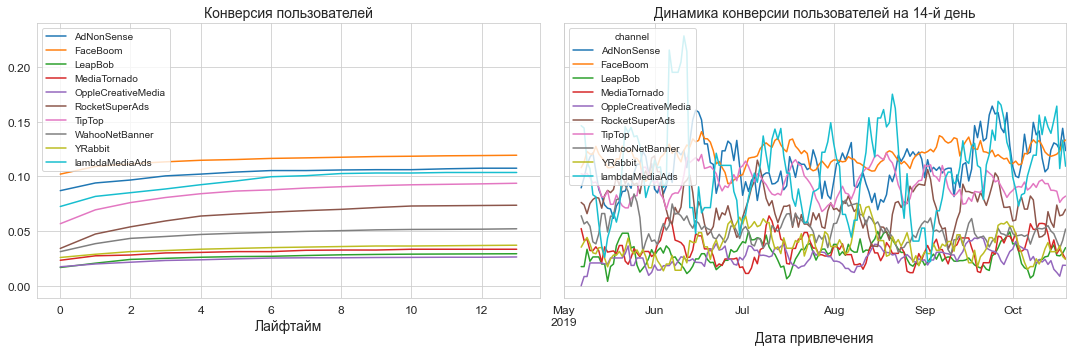

In [42]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей для Faceboom и AdNonSense неплохая и максимальная по сравнению с остальными. Динамика ее также +- постоянна.

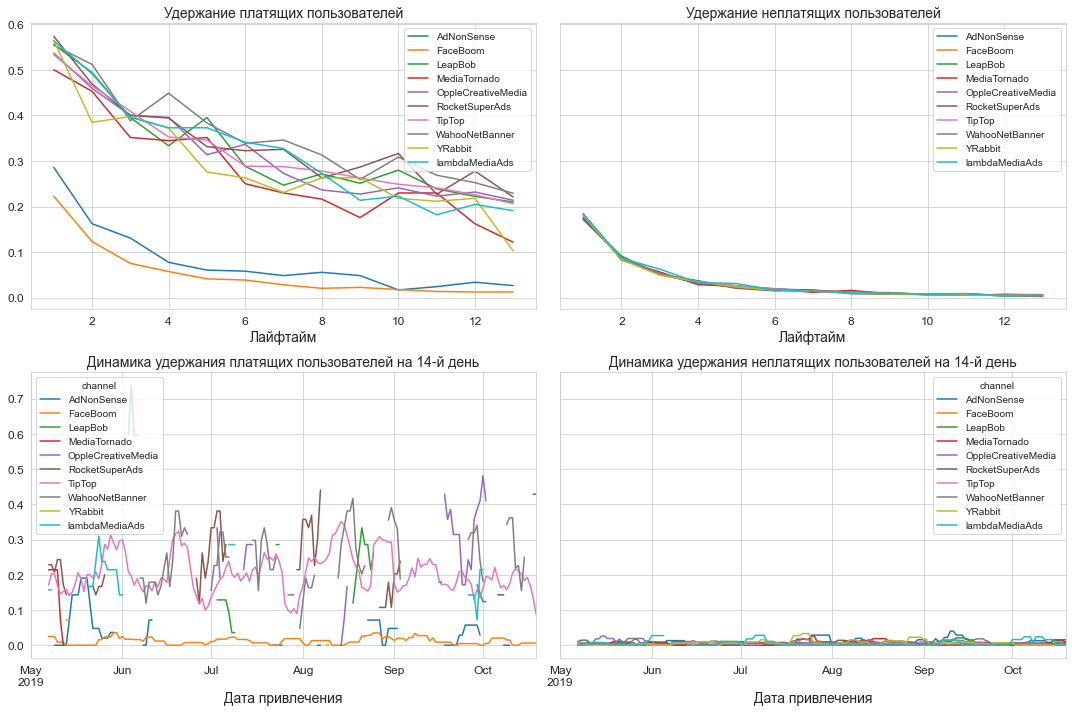

In [43]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

- Видим, что удержание платящих пользователей для этих каналов очень низкое.
- По динамике удержания на 14 день видно, что для FaceBoom удержание практически равно 0, а для adnonsense оно имее прерывистые значения также колебающиеся возле 0.
- Возможно причина плохой удерживаемости в технических неполадках

<a id='p17'></a>
## Анализ окупаемости рекламы с разбивкой по странам

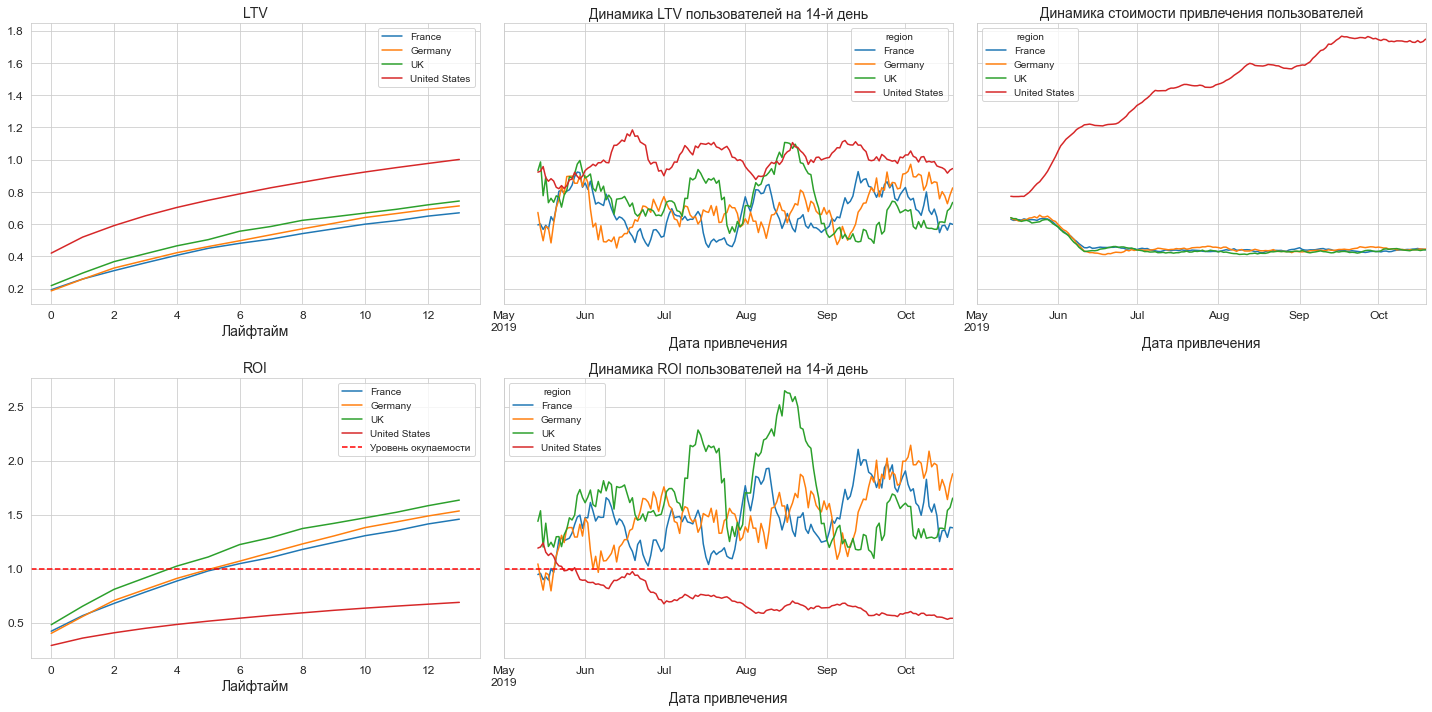

In [44]:
# смотрим окупаемость с разбивкой по регионам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Клиенты из USA самые ценные, LTV на 14 день около 1, по сравнению с другими странами France, Germany, UK где LTV соответсвенно 0.6, 0.7, 0.75 
- LTV на всем периоде анализа постоянна для всех стран, однако для UK есть пиковые значения в середине июля и августа.
- По динамике CAC видно, что стоимость привлечения с начала июня ступенчато возрастает для USA с 0.8 до 1.75, а для остальных стран имеется падение с начала июня по середину июня с 0.6 до 0.45, далее СAC не меняется
- Рынок USA является самым неэффективным по привлечению рекламы, Roi на 14 день около 70%. Остальные же страны окупаются уже на 5 день  и на 14 день ROI достигает 1.5, в порядке возрастания эффективности рекламы: UK, Germany, France. 
- По динамике ROI видно, что для USA на всем периоде анализа идет снижение и реклама не окупается. Для остальных стран ROI постоянен и выше порога окупаемости, для UK имееются приковые значения в середине июля и августа.

- Реклама в целом не окупается
- Негативное влияние на окупаемость рекламы оказывают следющие устройства: Mac, iPhone и android, следующие страны: USA, следующие каналы: titop, faceboom, adnonsense.
- Проблемы окупаемости вызваны большими расходами на рекламу, увеличивающуюся, возможно из-за модели оплаты рекламы. Если компания платит за просмотры, то расходы могут расти, а выручка нет.

Посмотрим профиля из USA с разибвкой по каналам привлечения

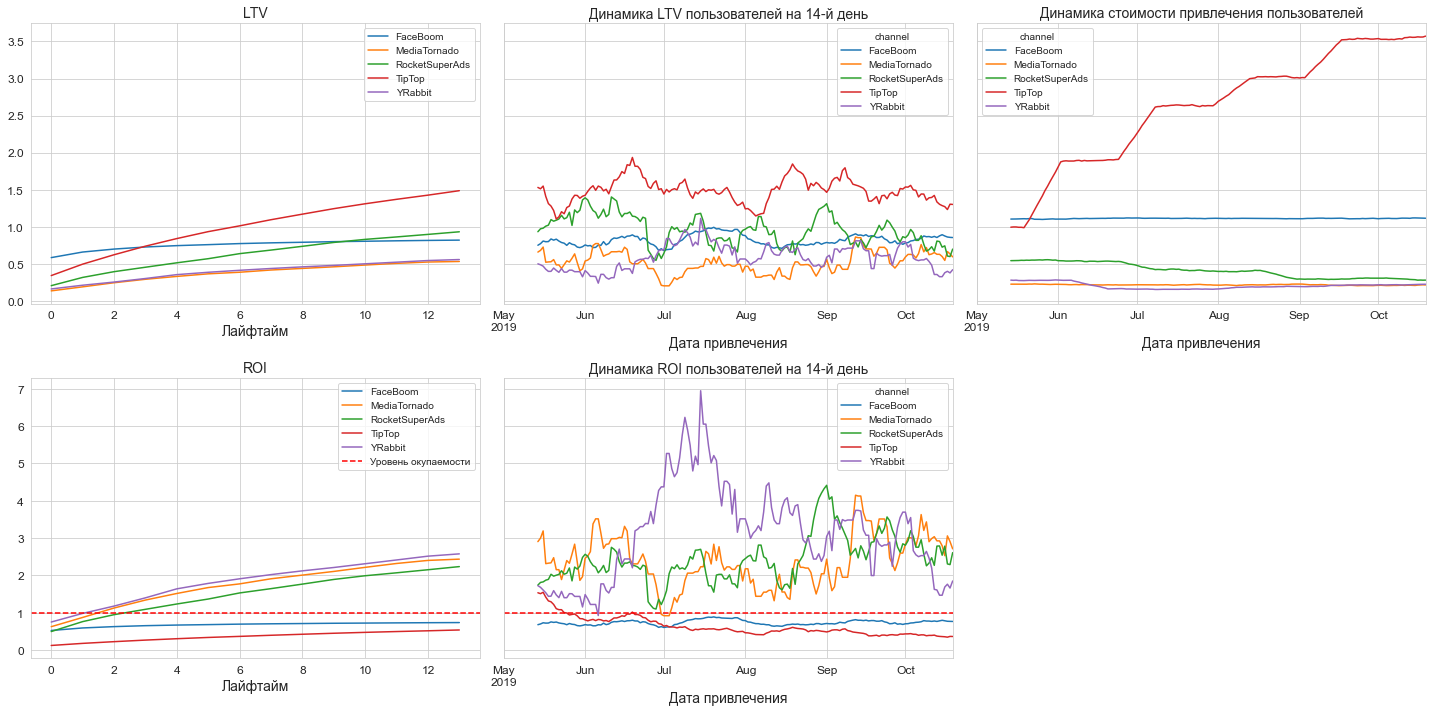

In [45]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1[(profiles1['region']=='United States')], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Видно, что сочетания (TipTop и USA) и (FaceBoom и USA) очень плохие и не окупаются 
-  Каналы Yrabbit, RocketSuperAds и MediaTornado окупаются, но их LTV намного меньше чем у TipTop

Посмотрим распределение количества уникальных пользователей по каналу привлечения и странам

In [46]:
profiles.groupby(['channel','region'])['user_id'].nunique()

channel             region       
AdNonSense          France            1366
                    Germany           1219
                    UK                1295
FaceBoom            United States    29144
LeapBob             France            2988
                    Germany           2519
                    UK                3046
MediaTornado        United States     4364
OppleCreativeMedia  France            2991
                    Germany           2562
                    UK                3052
RocketSuperAds      United States     4448
TipTop              United States    19561
WahooNetBanner      France            2971
                    Germany           2579
                    UK                3003
YRabbit             United States     4312
lambdaMediaAds      France             742
                    Germany            649
                    UK                 758
organic             France            6392
                    Germany           5453
                    

- Каналы TipTop, FaceBoom, MediaTornado, RocketSuperAds, YRabbit привлекают только жителей из региона USA

Посмотрим количество пользователей с группировкой по девайсу и региону

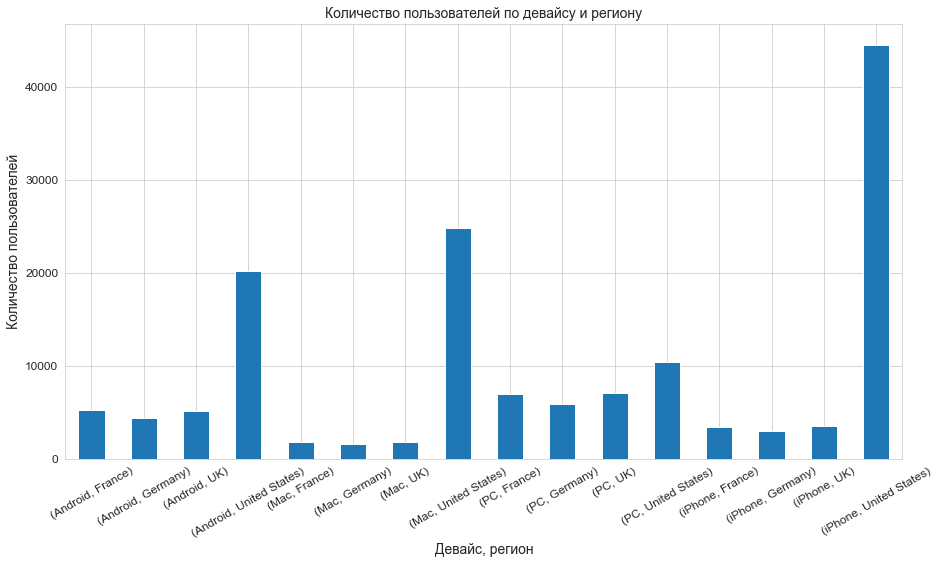

In [47]:
ax, fig = plt.subplots(figsize=(15,8))
ax = profiles.groupby(['device','region'])['user_id'].nunique().plot(kind='bar')
plt.xticks(rotation = 30) 
ax.set_title('Количество пользователей по девайсу и региону')
ax.set_xlabel('Девайс, регион')
ax.set_ylabel('Количество пользователей')
plt.show()

Видно, что очень много пользователей из США с Mac, Android, iPhone и PC.  
Можно сделать вывод, что компани решила привлечь новых пользователей с помощью захвата нового региона США. Поэтому вложения пошли TipTop и FaceBoom. Однако окупаемости рекламы не произошло, так как траты слишком высокие

<a id='p18'></a>
# Выводы и рекомендации

**Причины неэффективности привлечения пользователей:** 

1) Негативное влияние на окупаемость рекламы оказывают пользователи: Mac, iPhone и Android. Из страны: USA. Привлеченные с помощью каналов: TipTop и FaceBoom 

2) Неверный выбор способы оплаты рекламы. Если компания платит за просмотры, то расходы могут расти, а выручка нет.

3) Неверный выбор каналов привлечения (TipTop, FaceBoom).


**Рекомендации**:

1) Бюджет следует уменьшить у каналов:   titop, faceboom и adnonsense. Бюджет следует увеличить у каналов: YRabbit, MediaTornado, 'RocketSuperAds', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds.

2) Проверить канал привлечения FaceBoom и AdNonSense на предмет наличия технических ошибок